In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotting
import os
import tensorflow as tf

#  The path below is needed when running on Scully computer.
os.environ['PATH'] = '/home/xilinx/Vivado/2019.1/bin:' + os.environ['PATH'] 

In [11]:
from tensorflow.keras.models import load_model

In [10]:
import tensorflow 

In [12]:
model = load_model('L1JetTagModel.h5')

In [1]:
!pwd

/home/users/russelld/hls4ml-tutorial/hls4ml-tutorial


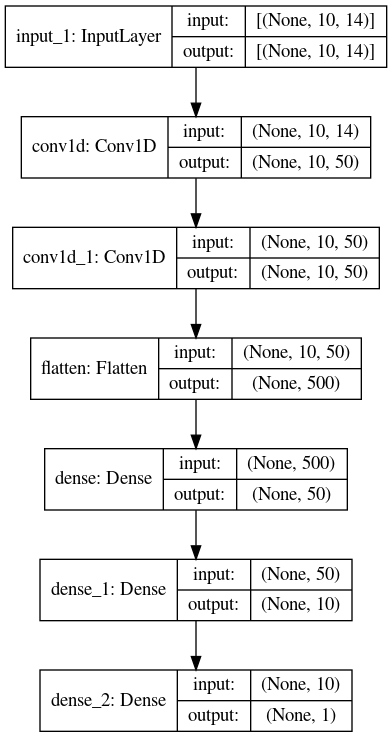

In [15]:
tensorflow.keras.utils.plot_model(model, show_shapes=True)

In [18]:
import hls4ml
config = hls4ml.utils.config_from_keras_model(model, granularity='name')
print("-----------------------------------")
plotting.print_dict(config)
print("-----------------------------------")

Interpreting Model
Topology:
Layer name: input_1, layer type: Input
Layer name: conv1d, layer type: Conv1D
  -> Activation (relu), layer name: conv1d
Layer name: conv1d_1, layer type: Conv1D
  -> Activation (relu), layer name: conv1d_1
Layer name: dense, layer type: Dense
  -> Activation (relu), layer name: dense
Layer name: dense_1, layer type: Dense
  -> Activation (relu), layer name: dense_1
Layer name: dense_2, layer type: Dense
  -> Activation (sigmoid), layer name: dense_2
-----------------------------------
Model
  Precision:         ap_fixed<16,6>
  ReuseFactor:       1
  Strategy:          Latency
LayerName
  input_1
    Precision
      result:        ap_fixed<16,6>
  conv1d
    Precision
      weight:        ap_fixed<16,6>
      bias:          ap_fixed<16,6>
      result:        ap_fixed<16,6>
    ReuseFactor:     1
  conv1d_relu
    Precision:       ap_fixed<16,6>
    ReuseFactor:     1
    table_size:      1024
    table_t:         ap_fixed<18,8>
  conv1d_1
    Precision
  

/home/users/russelld/miniconda3/envs/hls4ml-tutorial/lib/python3.8/site-packages/hls4ml/converters/__init__.py:15: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


In [32]:
config['LayerName']['conv1d']['ReuseFactor'] = 10
config['LayerName']['conv1d_relu']['ReuseFactor'] = 10
config['LayerName']['conv1d_1']['ReuseFactor'] = 10
config['LayerName']['conv1d_1_relu']['ReuseFactor'] = 10
config['LayerName']['dense']['ReuseFactor'] = 10

In [33]:
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='model_1/hls4ml_prj',
                                                       part='xcu250-figd2104-2L-e')

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: conv1d, layer type: Conv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 50]
Layer name: conv1d_1, layer type: Conv1D, input shapes: [[None, 10, 50]], output shape: [None, 10, 50]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 10, 50]], output shape: [None, 500]
Layer name: dense, layer type: Dense, input shapes: [[None, 500]], output shape: [None, 50]
Layer name: dense_1, layer type: Dense, input shapes: [[None, 50]], output shape: [None, 10]
Layer name: dense_2, layer type: Dense, input shapes: [[None, 10]], output shape: [None, 1]
Creating HLS model


$N_{multiplications}$ = $\sum^N_{n=2}$ $L_{n-1} * L_{n}$

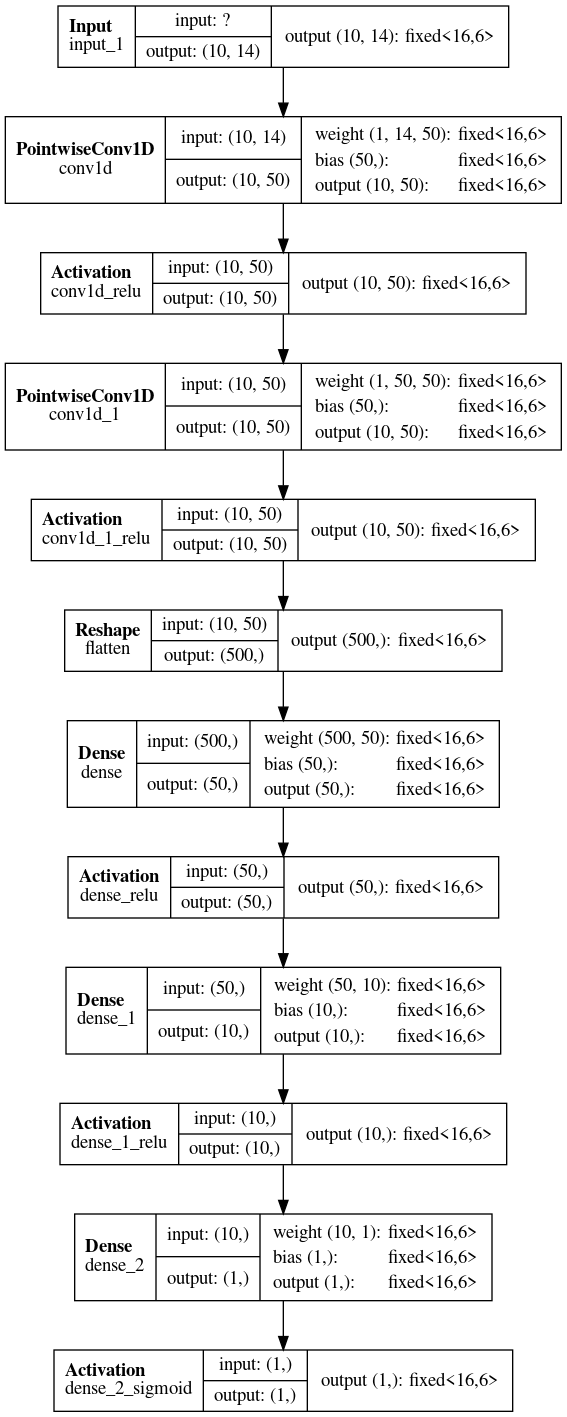

In [34]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

In [35]:
hls_model.compile()

Writing HLS project
Done


In [36]:
hls_model.build(csim=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.1 (64-bit)
  **** SW Build 2552052 on Fri May 24 14:47:09 MDT 2019
  **** IP Build 2548770 on Fri May 24 18:01:18 MDT 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /home/xilinx/Vivado/2019.1/scripts/vivado_hls/hls.tcl -notrace
INFO: Applying HLS Y2K22 patch v1.2 for IP revision
INFO: [HLS 200-10] Running '/home/xilinx/Vivado/2019.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'russelld' on host 'scully.physics.ucsd.edu' (Linux_x86_64 version 4.18.0-348.12.2.el8_5.x86_64) on Tue Sep 06 20:10:31 EDT 2022
INFO: [HLS 200-10] In directory '/home/users/russelld/hls4ml-tutorial/hls4ml-tutorial/model_1/hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/users/russelld/hls4ml-tutorial/hls4ml-tutorial/model_1/hls4ml_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding t

INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::mantissa' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:15) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::expv' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:18) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::__signbit' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:59) automatically.
INFO: [XFORM 203-602] Inlining function 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' into 'generic_cast_IEEE754<int, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/Float

INFO: [HLS 200-489] Unrolling loop 'Loop-1' (firmware/nnet_utils/nnet_activation.h:76) in function 'nnet::relu<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config8>' completely with a factor of 50.
INFO: [HLS 200-489] Unrolling loop 'Product1' (firmware/nnet_utils/nnet_dense_latency.h:85) in function 'nnet::dense_latency<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config7>' completely with a factor of 500.
ERROR: [XFORM 203-504] Stop unrolling loop 'Product1' (firmware/nnet_utils/nnet_dense_latency.h:85) in function 'nnet::dense_latency<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config7>' because it may cause large runtime and excessive memory usage due to increase in code size. Please avoid unrolling the loop or form sub-functions for code in the loop body.
ERROR: [HLS 200-70] Pre-synthesis failed.
command 'ap_source' returned

{}

In [37]:
hls4ml.report.read_vivado_report('model_1/hls4ml_prj/')

Found 1 solution(s) in model_1/hls4ml_prj//myproject_prj.
Reports for solution "solution1":

C simulation report not found.
Synthesis report not found.
Co-simulation report not found.
